# Riparazione affettiva post-infedeltà {#sec-clement-2022}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(
    lavaanExtra, lavaanPlot, semTools, haven, mediation, semPlot, 
    performance, car, lmtest, interactions, sjPlot
)

Caricamento dei namespace richiesti: pacman



## Introduzione

Lo scopo di questo capitolo è quello di discutere il tutorial di @clement2022step in cui la path anaysis viene impiegata per tre analisi statistiche: il modello di moderazione, il modello di mediazione semplice, e il modello di mediazione moderata.

## Modello di Mediazione Semplice

Esplorare se esiste un'associazione tra variabili implica l'uso di analisi correlazionali, come la correlazione bivariata. In questo tipo di analisi, non ci si preoccupa di capire se una variabile indipendente influenza una variabile dipendente, come nel caso della previsione. Tuttavia, quando è importante capire quale variabile influenza l'altra (ovvero la previsione), si utilizza spesso l'analisi di regressione lineare. Per eseguire un'analisi di regressione lineare, il ricercatore deve scegliere una variabile esplicativa (la variabile indipendente, IV o X) e una o più variabili di risposta (DV o Y). È importante notare che eseguire semplicemente un'analisi di regressione non fornisce prove conclusive sull'influenza di un'IV su una DV. Nel caso di un disegno di ricerca correlazionale, la scelta dell'IV e della DV per un'analisi di regressione si basa su un quadro teorico. 

Nel suo tutorial, @clement2022step propone il seguente esempio. Tra le coppie che hanno vissuto una trasgressione nella loro relazione, incoraggiare la ricostruzione della fiducia nel trasgressore può aiutare il partner ferito a perdonarlo [@hargrave2016restoration]. In questo scenario, l'IV è la fiducia nel trasgressore, e la DV è il perdono. Tuttavia, esplorare come la fiducia nel trasgressore può aiutare il partner ferito a perdonarlo potrebbe fornire un'idea più approfondita delle aree su cui concentrarsi nella terapia di coppia, che potrebbe incoraggiare la fiducia e quindi il perdono. Eseguire un'analisi di un modello di mediazione semplice può far luce su tali aree di intervento.

In un modello di mediazione semplice, l'IV ha un effetto su una variabile aggiuntiva o terza, chiamata variabile mediatrice (M), che a sua volta ha un effetto sulla DV quando l'IV è mantenuta costante. In altre parole, l'IV è associata alla DV attraverso M. Questa relazione è l'effetto indiretto, che costituisce la relazione di mediazione. 

::: {#fig-clement-1}
![](../../figures/clement_2022.png){width="70%"}

Pannello A: Mediazione semplice; Pannello B: Moderazione; e Pannello C: Modelli di Mediazione Moderata. Nel Pannello A, le linee tratteggiate indicano il percorso indiretto (ab), mentre la linea continua indica il percorso diretto (c'). (Figura tratta da @clement2022step)
:::

Ad esempio, la ricerca dimostra che la fiducia in un partner romantico è associata alla compassione per quel partner (Salazar, 2015), e la compassione è anche uno dei più forti predittori di perdono (Davis, 2017). Pertanto, si potrebbe ipotizzare che la fiducia sia associata al perdono attraverso la compassione per il partner romantico. Nello specifico, si potrebbe testare un modello di mediazione in cui la fiducia nel partner romantico influenza la compassione per il partner (a), e la compassione per il partner influenza il perdono di quel partner (b), il che costituirebbe l'effetto indiretto della fiducia nel partner romantico sul perdono attraverso la compassione per il partner romantico (ab). Se l'analisi di questo modello suggerisce che l'effetto indiretto è robusto, si potrebbe concludere statisticamente che la compassione media l'associazione tra fiducia nel partner romantico e perdono. Se l'effetto indiretto è trascurabile, allora non c'è mediazione, e non si può concludere che la compassione giochi un ruolo nell'associazione tra fiducia nel partner romantico e perdono.

Oltre all'effetto indiretto, un modello di mediazione esamina anche l'effetto diretto dell'IV sulla DV. Continuando con lo scenario sopra, questo comporterebbe l'esame se la fiducia nel partner romantico sia associata al perdono di quel partner quando la compassione è mantenuta costante. L'effetto diretto (c′) e l'effetto indiretto (ab) combinati costituiscono l'effetto totale (c) del modello di mediazione, come mostrato nella Figura 1A. Nello specifico, l'effetto indiretto è il prodotto del percorso a e del percorso b (a × b), mentre l'effetto totale è la somma dell'effetto indiretto e dell'effetto diretto (c = c′ + a × b). 

In letteratura, si parla di "mediazione completa" quando c'è un effetto indiretto significativo ed effetto diretto non significativo; si parla di "mediazione parziale" quando gli effetti indiretto e diretto sono entrambi significativi (Meule, 2019).

Pertanto, analizzare un modello di mediazione semplice potrebbe aiutare a comprendere come la compassione per un partner romantico sia associata alla fiducia in quel partner e al perdono. Ugualmente importante è esaminare quando la fiducia in un partner romantico è correlata alla compassione per il partner, il che comporta l'esame di un modello di moderazione.

## Modello di Moderazione

Nel caso di un modello di moderazione siamo interessati a determinare se una terza variabile, o una variabile moderatrice (W), influenzi la forza o la direzione dell'associazione tra la variabile indipendente (IV) e la variabile dipendente (DV). In particolare: 

> Identificare un moderatore di un effetto aiuta a stabilire le condizioni limite di quell'effetto o le circostanze, gli stimoli o il tipo di persone per cui l'effetto è maggiore o minore, presente o assente, positivo o negativo, e così via" (Hayes, 2018, p. 220).

Dal punto di vista statistico, testare un modello di moderazione è simile a testare l'interazione tra fattori in un'analisi della varianza (ANOVA; Frazier, Tix, & Barron, 2004). Un effetto di interazione è presente quando l'effetto dell'IV sulla DV è condizionato da W (Hayes, 2018). In altre parole, siamo interessati a capire se l'associazione tra IV e DV varia a diversi livelli di W. 

La @fig-clement-1 B mostra un diagramma di un modello di moderazione.   Ritornando all'esempio di fiducia, compassione e perdono, i ricercatori potrebbero essere interessati a capire in quali circostanze la fiducia influenza la compassione. Nella ricerca sui comportamenti sociali sani, l'umiltà è stata identificata come un elemento importante nella coltivazione della compassione (Worthington & Allison, 2018). Infatti, studi hanno dimostrato che considerare il proprio partner romantico come umile è associato al vederlo anche come compassionevole (es. McDonald, Olson, Goddard, & Marshall, 2018). Inoltre, la ricerca ha mostrato un'associazione tra fiducia e umiltà (es. Wang, Edwards, & Hill, 2017). Si potrebbe ipotizzare un modello di moderazione in cui l'associazione tra fiducia e compassione per il partner romantico è condizionata dal considerare il partner come umile.

## Modello di Mediazione Moderata

Il concetto di mediazione moderata, introdotto da James e Brett (1984), riguarda l’esame di come la variabile moderatrice (W) influenzi l'entità di un effetto indiretto (Preacher, Rucker, & Hayes, 2007). Più precisamente, si parla di mediazione moderata quando una relazione di mediazione dipende dal livello di un moderatore (Preacher et al., 2007). 

La @fig-clement-1 C rappresenta un modello di mediazione moderata. Riprendendo l'esempio della fiducia, umiltà, compassione e perdono, potremmo ipotizzare un modello di mediazione moderata in cui la fiducia nel partner romantico (X) è associata al perdono (Y) attraverso la compassione per quel partner (M), e questa associazione è rafforzata dalla percezione del partner come umile (W).

## Esempio di Mediazione Moderata

Nel suo tutorial, @clement2022step utilizza i dati di uno studio che ha esaminato l’associazione tra fiducia di coppia, compassione verso il partner che ha ferito, percezione di quel partner come umile, e perdono in persone che hanno vissuto un "attaccamento ferito" nella loro relazione romantica. Le ferite da attaccamento sono definite come una violazione percepita della fiducia o un abbandono che si verifica in un momento critico in cui c'era bisogno del sostegno e della cura del partner romantico (Johnson, Makinen, & Millikin, 2001). In questo studio, la fiducia di coppia si riferisce al grado di onestà e buona volontà che il partner ferito percepisce nel partner che ha commesso l'offesa (Larzelere & Huston, 1980). Un aspetto cruciale per la risoluzione delle ferite da attaccamento e il ripristino della fiducia in una relazione romantica è il perdono, che nello studio è stato definito come la presenza di alti livelli di motivazioni benevolenti (es. buona volontà) e bassi livelli di motivazioni di evitamento o vendetta verso il partner che ha commesso l'offesa.

**Partecipanti**

Il campione utilizzato per questo tutorial era composto da 138 persone che hanno riferito di aver vissuto una ferita da attaccamento nella loro attuale relazione romantica e di aver perdonato il proprio partner. 

I partecipanti hanno completato i questionari auto-compilati online.

I partecipanti hanno descritto brevemente la ferita da attaccamento subita nella relazione e indicato se avevano perdonato o meno il partner romantico per tale ferita (sì/no).

La fiducia di coppia è stata misurata utilizzando la **Dyadic Trust Scale** (DTS; Larzelere & Huston, 1980), composta da 8 item valutati su una scala da 1 (fortemente d'accordo) a 7 (fortemente in disaccordo).

La compassione verso il partner è stata misurata con la **Compassion Scale** (CS; Pommier, Neff, & Tóth-Király, 2020), modificata per riflettere la compassione verso il partner che ha commesso l'offesa. La scala includeva 16 item valutati da 1 (quasi mai) a 5 (quasi sempre).

La percezione del partner come umile è stata misurata con la **Relational Humility Scale** (RHS; Davis et al., 2011), modificata per riflettere i sentimenti attuali del partner ferito verso il partner che ha commesso l'offesa. Gli item sono stati valutati su una scala da 1 (fortemente in disaccordo) a 5 (fortemente d'accordo).

Il perdono del partner che ha commesso l'offesa è stato misurato con il **Transgressions-related Interpersonal Motivations Inventory** (TRIM; McCullough et al., 1998; McCullough, Fincham, & Tsang, 2003). Il TRIM misura:
    - Motivazione ad evitare il partner.
    - Motivazione a cercare vendetta.
    - Motivazione a dimostrare benevolenza verso il partner.

Per questo studio, il perdono è stato definito come bassi livelli di motivazione ad evitare o vendicarsi del partner, e alti livelli di motivazione benevolente verso di lui/lei. L'esempio discusso nel tutorial include solo la sottoscala della benevolenza del TRIM-18.

In [4]:
# Load the data from SPSS file
data <- read_sav(here::here("data", "clement_2022.sav"))

In [4]:
glimpse(data)

Rows: 138
Columns: 4
$ CS_TOT   <dbl> 58, 68, 66, 70, 70, 44, 66, 76, 67, 43, 66, 68, 68,~
$ RHSTOT   <dbl> 59, 53, 52, 35, 55, 36, 53, 54, 49, 45, 27, 52, 34,~
$ TRIM_Ben <dbl> 19, 22, 26, 24, 25, 12, 21, 29, 30, 6, 25, 17, 29, ~
$ DTST     <dbl> 54, 51, 48, 34, 48, 32, 52, 52, 49, 47, 36, 34, 47,~


In [5]:
# Statistiche descrittive
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CS_TOT,1,138,64.18841,8.530367,66.0,65.04464,8.1543,35,76,41,-0.8842272,0.5045965,0.7261531
RHSTOT,2,138,42.92029,10.191639,44.5,43.33929,11.1195,17,60,43,-0.3316798,-0.5684271,0.8675700
TRIM_Ben,3,138,21.85507,5.679456,22.0,22.34821,5.9304,6,30,24,-0.7369178,0.1218593,0.4834674
DTST,4,138,38.59420,10.249898,39.0,38.96429,11.8608,11,56,45,-0.2566815,-0.6359079,0.8725292


In [7]:
# Identificazione degli outliers per ogni variabile
outliers_results <- check_outliers(data)

# Visualizzazione dei risultati
print(outliers_results)

OK: No outliers detected.
- Based on the following method and threshold: mahalanobis (20).
- For variables: CS_TOT, RHSTOT, TRIM_Ben, DTST



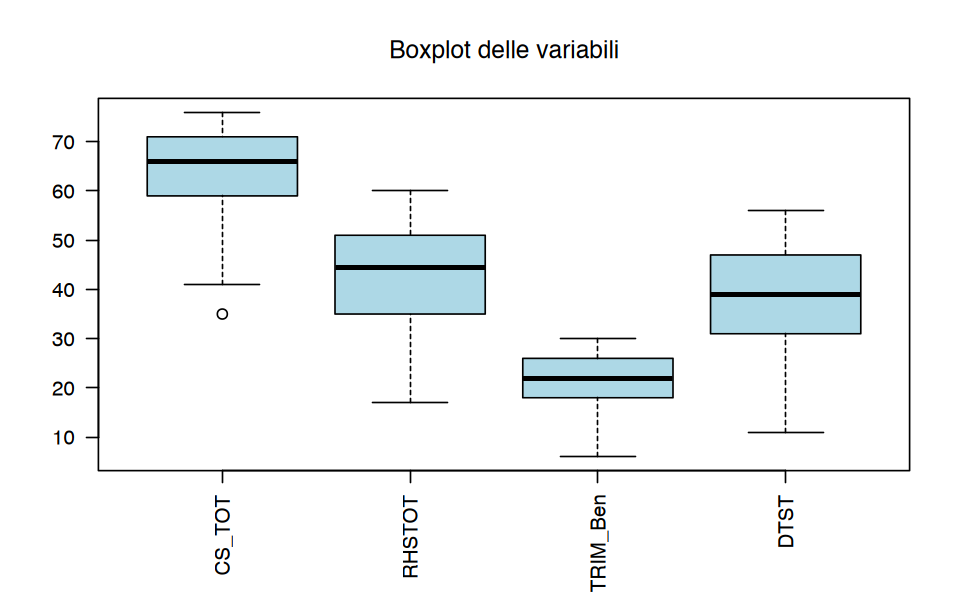

In [8]:
# Visualizzare un boxplot con outliers
boxplot(data, main = "Boxplot delle variabili", col = "lightblue", las = 2)

## Indipendenza

Per soddisfare l'assunzione di indipendenza nella regressione, i residui del modello devono essere indipendenti. Questo significa che l'errore nella stima di un partecipante non deve influenzare l'errore nella stima di un altro partecipante. Nel nostro esempio, ciò vuol dire che l'errore nella stima del punteggio di benevolenza di un partecipante non dovrebbe influenzare l'errore nella stima del punteggio di un altro partecipante. Per verificare questa assunzione, utilizzeremo la statistica di Durbin-Watson, che testa la presenza di autocorrelazione nei termini di errore (Uyanto, 2020).

La statistica di Durbin-Watson varia tra 0 e 4, e valori compresi tra 1.5 e 2.5 indicano che l'assunzione di indipendenza è rispettata (Glen, 2022). 

In R, possiamo utilizzare la funzione `durbinWatsonTest()` dal pacchetto **car** per testare l'assunzione di indipendenza dei residui in un modello di regressione.

Prima di testare l'indipendenza dei residui, dobbiamo definire un modello di regressione. Per esempio, possiamo creare un modello dove `TRIM_Ben` è la variabile dipendente e `DTST`, `CS_TOT` e `RHSTOT` sono le variabili indipendenti:

In [10]:
# Creazione del modello di regressione
model <- lm(TRIM_Ben ~ DTST + CS_TOT + RHSTOT, data = data)

Dopo aver creato il modello, possiamo testare l'indipendenza dei residui utilizzando la funzione `durbinWatsonTest()`:

In [11]:
# Esecuzione del test di Durbin-Watson per verificare l'indipendenza dei residui
dw_test <- durbinWatsonTest(model)

# Visualizzazione del risultato
print(dw_test)

 lag Autocorrelation D-W Statistic p-value
   1     -0.03195449      2.035422    0.83
 Alternative hypothesis: rho != 0


Il valore del test di Durbin-Watson varierà tra 0 e 4, e un valore compreso tra **1.5 e 2.5** indica che l'assunzione di indipendenza dei residui è soddisfatta. Possiamo quindi procedere a verificare la successiva assunzione, cioè quella di linearità.

## Linearità

Un'ipotesi fondamentale nella regressione è che le variabili indipendenti (IV) siano correlate con la variabile dipendente (DV) in modo lineare. Questo significa che all'aumentare o al diminuire delle IV, i valori della DV aumentano o diminuiscono in modo proporzionale. Per verificare questa ipotesi, si può tracciare un grafico tra le IV e la DV, oppure utilizzare grafici parziali per verificare la relazione lineare tra ciascuna IV e la DV.

Nel suo tutorial, @clement2022step verifica l'assunzione di linearità tra tutte le variabili usando un grafico di dispersione che confronta i residui studentizzati (SRE_1) e i valori previsti non standardizzati (PRE_1).

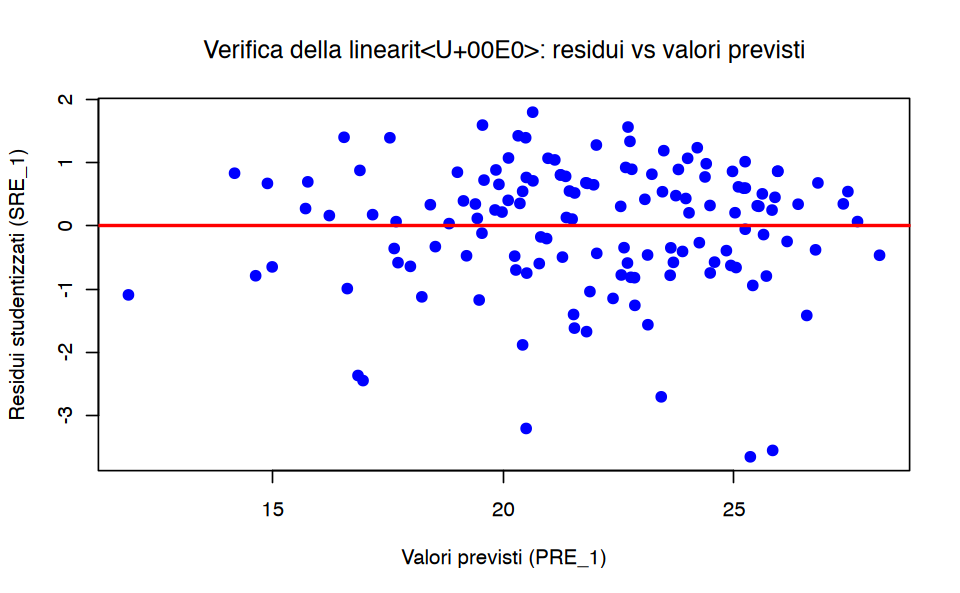

In [12]:
# Calcolare i residui studentizzati e i valori previsti
SRE_1 <- rstudent(model) # Residui studentizzati
PRE_1 <- predict(model) # Valori previsti non standardizzati

# Creare un grafico di dispersione per verificare la linearità
plot(PRE_1, SRE_1,
    main = "Verifica della linearità: residui vs valori previsti",
    xlab = "Valori previsti (PRE_1)",
    ylab = "Residui studentizzati (SRE_1)",
    pch = 19, col = "blue"
)
abline(h = 0, col = "red", lwd = 2)

Se i punti nel grafico sono distribuiti in modo casuale attorno alla linea orizzontale (che rappresenta i residui pari a 0), l'assunzione di linearità è soddisfatta. Se invece si notano dei pattern, questo potrebbe essere indicativo di una violazione della linearità.

## Omoschedasticità

L'assunzione di **omoschedasticità** richiede che l'errore nella relazione tra le variabili indipendenti (IV) e la variabile dipendente (DV) sia costante su tutti i valori delle IV. Quando questa assunzione è violata, si verifica **eteroschedasticità**, che significa che l'errore (la variabilità nei punteggi della DV non spiegata dalle IV) varia in base ai punteggi della DV (Osborne & Waters, 2002). Per verificare se questa assunzione è soddisfatta, possiamo utilizzare lo stesso grafico di dispersione dei residui che abbiamo creato prima. Se i residui sono distribuiti in modo casuale attorno ai valori previsti e formano una forma rettangolare, possiamo concludere che l'assunzione di omoschedasticità è soddisfatta.

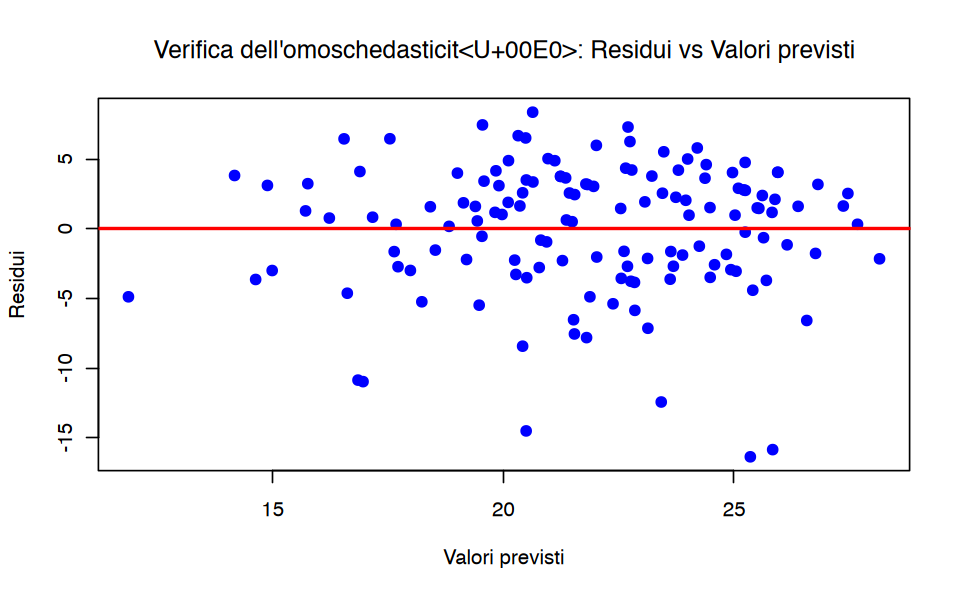

In [13]:
 # Calcolo dei residui e dei valori previsti
 residuals <- resid(model)
 predicted_values <- predict(model)

 # Grafico di dispersione per verificare l'omoschedasticità
 plot(predicted_values, residuals,
     main = "Verifica dell'omoschedasticità: Residui vs Valori previsti",
     xlab = "Valori previsti",
     ylab = "Residui",
     pch = 19, col = "blue"
 )
 abline(h = 0, col = "red", lwd = 2)

- Se i punti nel grafico sono distribuiti casualmente attorno alla linea orizzontale (che rappresenta residui pari a 0) e non mostrano alcun pattern evidente (ad esempio, non formano un cono o una forma curva), allora l'assunzione di omoschedasticità è soddisfatta.
- Se invece i punti mostrano una dispersione non uniforme (ad esempio, aumentano o diminuiscono con i valori previsti), potrebbe esserci eteroschedasticità, e l'assunzione sarebbe violata.

È anche possibile  eseguire un test statistico per l'omoschedasticità, come il test di Breusch-Pagan, utilizzando il pacchetto `lmtest`:

In [15]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 3.4348, df = 3, p-value = 0.3293


- Se il **p-value** è alto (di solito > 0.05), non ci sono evidenze di eteroschedasticità e l'assunzione di omoschedasticità è soddisfatta.
- Se il **p-value** è basso (di solito < 0.05), c'è eteroschedasticità e l'assunzione è violata.

## Multicollinearità

Quando due o più variabili indipendenti (IV) sono fortemente correlate tra loro, potrebbe esserci **multicollinearità**, il che significa che i punteggi di una o più IV sono determinati da altre IV nel modello (Kim, 2019). Per verificare se esiste multicollinearità, possiamo calcolare il **fattore di inflazione della varianza** (VIF) o la **statistica di tolleranza**. Queste due misure sono reciproche, quindi è sufficiente controllarne una. 

- La **tolleranza** dovrebbe essere superiore a 0.1.
- Il **VIF** non dovrebbe superare il valore di 10 (Miles, 2005).

In [ ]:
 # Calcolo del VIF per le variabili indipendenti
 vif_values <- vif(model)

 # Visualizzazione dei valori VIF
 print(vif_values)

- Se tutti i valori di **VIF** sono inferiori a 10, non c'è multicollinearità nel modello.
- Se trovi valori di **VIF** superiori a 10, potresti avere un problema di multicollinearità e dovresti considerare di rimuovere o combinare alcune variabili indipendenti.

## Normalità

L'assunzione di **normalità** richiede che i residui, ossia gli errori nella stima, siano distribuiti normalmente (Hayes, 2018). Per verificare questa assunzione, possiamo ispezionare visivamente l'istogramma dei residui sovrapposto a una curva di normalità e un grafico P-P (probability-probability plot). 

- **Istogramma**: Se i residui sono distribuiti normalmente, l'istogramma avrà una forma simile a una campana.
- **Grafico P-P**: Se i punti si allineano bene lungo la diagonale, significa che la distribuzione è normale.

Anche se ci sono piccole deviazioni dalla normalità, la regressione è robusta a violazioni non gravi della normalità, quindi possiamo comunque procedere con l'analisi.

**Verificare la normalità visivamente**

Creeremo un istogramma dei residui e sovrapporremo una curva di densità normale per vedere se i residui seguono una distribuzione normale.

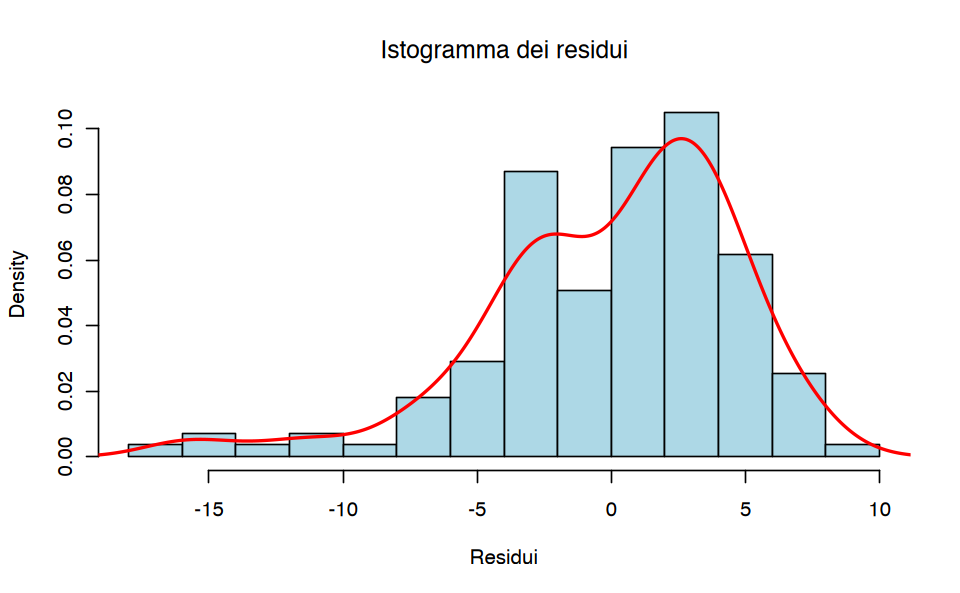

In [17]:
# Calcolo dei residui
residuals <- resid(model)

# Creare l'istogramma con curva di normalità sovrapposta
hist(residuals,
    prob = TRUE, main = "Istogramma dei residui",
    xlab = "Residui", col = "lightblue", border = "black"
)

# Sovrapporre la curva di normalità
lines(density(residuals), col = "red", lwd = 2)

Se la curva rossa (curva di densità) segue bene la forma dell'istogramma, possiamo concludere che i residui sono distribuiti normalmente.

Un altro metodo per verificare la normalità è creare un grafico P-P (probability-probability plot).

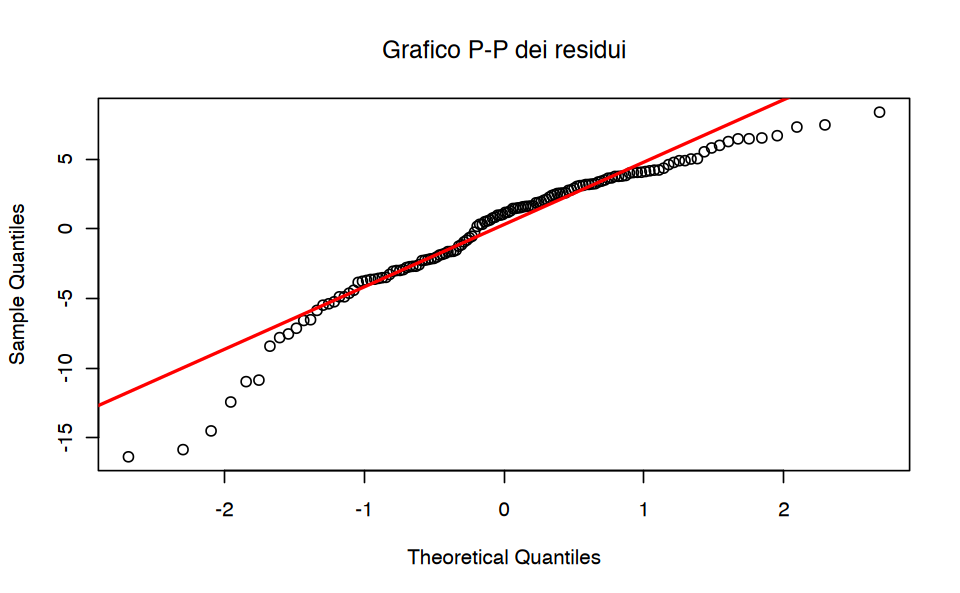

In [18]:
# Creazione del P-P plot
qqnorm(residuals, main = "Grafico P-P dei residui")
qqline(residuals, col = "red", lwd = 2)

Se i punti nel grafico P-P seguono da vicino la linea diagonale, i residui sono distribuiti normalmente. Se ci sono alcune deviazioni, la regressione è comunque robusta a violazioni lievi della normalità.

## Analisi di moderazione

Per determinare se esiste una relazione di moderazione tra DTST (fiducia di coppia) e RHSTOT (umiltà percepita del partner), possiamo fare riferimento ai risultati dell'output del seguente modello di regressione lineare:

In [21]:
# Creare il modello di moderazione
model <- lm(CS_TOT ~ DTST * RHSTOT, data = data)
summary(model)


Call:
lm(formula = CS_TOT ~ DTST * RHSTOT, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.8585  -4.1310   0.8514   5.9536  15.0329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.858218   9.903011   7.559 5.73e-12 ***
DTST        -0.516985   0.279163  -1.852   0.0662 .  
RHSTOT      -0.354859   0.241398  -1.470   0.1439    
DTST:RHSTOT  0.014269   0.006175   2.311   0.0224 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.103 on 134 degrees of freedom
Multiple R-squared:  0.1174,	Adjusted R-squared:  0.09759 
F-statistic: 5.939 on 3 and 134 DF,  p-value: 0.0007811


Dalla tabella dei coefficienti, possiamo notare che:

- L'intercetta ha un valore stimato di 74.86, con un errore standard di 9.90, risultando altamente significativa (p < 0.001).
- L'effetto principale di *DTST* (fiducia di coppia) è negativo (b = -0.517), ma non significativo al 5% (p = 0.0662).
- L'effetto principale di *RHSTOT* (percezione dell'umiltà del partner) è anch'esso negativo (b = -0.355), ma non significativo (p = 0.1439).
- Tuttavia, l'interazione tra *DTST* e *RHSTOT* risulta significativa (b = 0.0143, p = 0.0224), suggerendo che l'effetto di *DTST* su *CS_TOT* varia in base ai livelli di *RHSTOT*.

### Interpretazione dell'interazione
Poiché l'interazione è significativa, significa che l'associazione tra la fiducia di coppia (*DTST*) e la compassione verso il partner che ha ferito (*CS_TOT*) dipende dalla percezione dell'umiltà del partner (*RHSTOT*). Questo implica che la fiducia di coppia avrà un effetto diverso sulla compassione a seconda del livello di umiltà percepita.

### Pendenze semplici
Per visualizzare questa interazione, possiamo usare un grafico che mostra l'effetto di *DTST* (fiducia di coppia) su *CS_TOT* (compassione) a tre livelli di *RHSTOT* (umiltà percepita del partner): alla media, e a ±1 deviazione standard dalla media. Il codice fornito per visualizzare le pendenze semplici è:

[1] 42.92029

[1] 10.19164

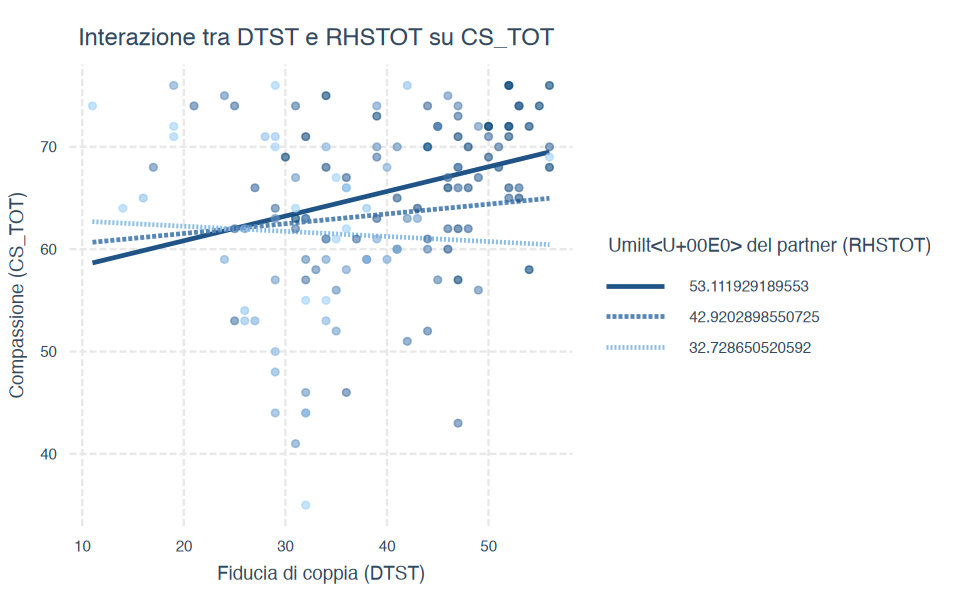

In [23]:
# Calcolo della media e delle deviazioni standard di RHSTOT
mean_RHSTOT <- mean(data$RHSTOT, na.rm = TRUE)
sd_RHSTOT <- sd(data$RHSTOT, na.rm = TRUE)

# Stampa dei valori
mean_RHSTOT
sd_RHSTOT

# Visualizzare le semplici pendenze dell'interazione usando la media e ± 1 SD
interact_plot(model,
    pred = DTST, modx = RHSTOT,
    modx.values = c(mean_RHSTOT - sd_RHSTOT, mean_RHSTOT, mean_RHSTOT + sd_RHSTOT),
    plot.points = TRUE,
    main.title = "Interazione tra DTST e RHSTOT su CS_TOT",
    x.label = "Fiducia di coppia (DTST)",
    y.label = "Compassione (CS_TOT)",
    legend.main = "Umiltà del partner (RHSTOT)"
)

Dal grafico risultante, possiamo visualizzare le pendenze dell'interazione, mostrando come l'effetto della fiducia di coppia sulla compassione cambi in base ai diversi livelli di umiltà percepita del partner. Questo tipo di visualizzazione permette di vedere chiaramente che quando *RHSTOT* è alto (partner percepito come molto umile), l'effetto di *DTST* su *CS_TOT* aumenta.

### Analisi della Mediazione

Ora dobbiamo capire se c'è un'associazione diretta tra la variabile indipendente (*X*, ad esempio, la fiducia di coppia) e la variabile dipendente (*Y*, ad esempio, il perdono). Per farlo, analizziamo il riepilogo del modello per la variabile di esito *TRIM_Ben* (che rappresenta il perdono).

In [6]:
# Definizione del modello di mediazione
model <- "
  # Effetto diretto di DTST su TRIM_Ben
  TRIM_Ben ~ c_prime*DTST

  # Effetto di DTST su CS_TOT (mediazione)
  CS_TOT ~ a*DTST

  # Effetto di CS_TOT su TRIM_Ben (mediazione)
  TRIM_Ben ~ b*CS_TOT

  # Effetto indiretto (a * b)
  ab := a*b

  # Effetto totale di DTST su TRIM_Ben
  total := c_prime + ab
"

# Esegui il modello con i dati
fit <- sem(model, data = data)

# Riassunto dei risultati
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
  print()

lavaan 0.6-19 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5

  Number of observations                           138

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                                60.916
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -895.673
  Loglikelihood unrestricted model (H1)       -895.673
                                                  

### Interpretazione del Modello di Mediazione

L'output di **lavaan** fornisce tutte le informazioni necessarie per interpretare il modello di mediazione, con particolare attenzione ai coefficienti standardizzati e non standardizzati. Poiché il modello presenta zero gradi di libertà, non è possibile interpretare gli indici di adattamento (CFI, TLI, RMSEA). L'interpretazione si concentra quindi sui coefficienti del modello di percorso.

### Effetto Diretto e Indiretto
- **Effetto diretto** (*c' path*): Il coefficiente di percorso standardizzato dell'effetto diretto di *DTST* (fiducia di coppia) su *TRIM_Ben* (perdono) è pari a 0.267, con un coefficiente non standardizzato di 0.148 (SE = 0.040, z = 3.691, p < 0.001). Questo risultato indica che la fiducia di coppia ha un effetto positivo diretto sul perdono. Le persone che hanno maggiore fiducia nel partner tendono a mostrare un livello più elevato di perdono, indipendentemente dalla compassione verso il partner.

- **Effetto indiretto** (*ab path*): Il coefficiente standardizzato per l'effetto indiretto di *DTST* su *TRIM_Ben*, mediato da *CS_TOT* (compassione), è pari a 0.104, con un coefficiente non standardizzato di 0.058 (SE = 0.022, z = 2.589, p = 0.010). Questo suggerisce che la fiducia di coppia influisce sul perdono anche attraverso la compassione. In altre parole, una maggiore fiducia nel partner porta a un aumento della compassione verso di lui, e questo incremento di compassione favorisce ulteriormente il perdono.

### Effetto Totale
- **Effetto totale**: Sommando gli effetti diretto e indiretto, l'effetto totale di *DTST* su *TRIM_Ben* è pari a 0.371, con un coefficiente non standardizzato di 0.205 (SE = 0.044, z = 4.690, p < 0.001). Ciò indica che la fiducia di coppia ha un'influenza complessiva positiva sul perdono, sia direttamente che attraverso la mediazione della compassione.

### Varianza Spiegata (R²)
- La fiducia di coppia e la compassione spiegano il **31.9%** della varianza in *TRIM_Ben* (perdono), suggerendo che questi predittori contribuiscono in modo sostanziale a spiegare il perdono.
- Inoltre, *DTST* spiega il **5.6%** della varianza in *CS_TOT* (compassione), indicando che una parte dell'influenza della fiducia di coppia è esercitata attraverso la compassione.

### Conclusioni
In sintesi:
1. **Effetto diretto**: La fiducia di coppia (*DTST*) ha un'influenza positiva diretta sul perdono (*TRIM_Ben*), con un coefficiente standardizzato pari a 0.267. Questo significa che, indipendentemente da altri fattori, le persone che hanno più fiducia nel partner sono più inclini a perdonare.
2. **Effetto indiretto**: Oltre all'effetto diretto, c'è un'influenza indiretta mediata dalla compassione (*CS_TOT*), con un coefficiente standardizzato pari a 0.104. Questo implica che la fiducia di coppia aumenta la compassione verso il partner, e la maggiore compassione favorisce ulteriormente il perdono.
3. **Effetto totale**: L'effetto complessivo della fiducia di coppia sul perdono, che include sia l'effetto diretto che quello mediato dalla compassione, è pari a 0.371, evidenziando un'influenza positiva e significativa.

### Implicazioni
Questi risultati suggeriscono che per promuovere il perdono, la fiducia nel partner è un fattore chiave. Tuttavia, anche la compassione verso il partner gioca un ruolo essenziale, mediando parte dell'effetto della fiducia sul perdono. Pertanto, lavorare sia sulla fiducia che sulla compassione potrebbe essere utile per migliorare la capacità di perdonare in una relazione di coppia. associationbetweenDTST andCS_TOT issignificant[CI
=.0005,.0252,line101]. Thedirectandindirecteffectsof
DTST andCS_TOT onTRIM_Ben werealsosignificant
[CI=.0584,.2288and.1920,.3885; lines105and106re-
spectively].Wenowturntoanexampleofhowwewould
reporttheresultsofourmoderationmediationanalysis.
Step5:Reportingresults. Usingthescenarioforthistu-
torialtoreportthestatisticalfindings, weconcludethat
thereisasignificantmoderationeffectoftheperceptionof
theinjuringpartnerashumble(W)ontheassociationbe-
tweendyadictrust(X)andforgiveness(Y)throughcompas-
sionfortheinjuringpartner(M)[a path;t(134) = 2.3107,
p=
.0224]. Additionally, compassion for the injuring
partner(M)hasasignificanteffectonforgiveness(Y)[b
path;t(135) = 5.9916,p < .0001];however,dyadictrust
(X)doesnothaveasignificantdirecteffectonforgiveness
(Y)[c′ path; t(135) = 3.6509,p=
.0678]. Overall,this
modelindicatesastatisticallysignificantmoderatedme-
diation. Thissuggeststhattheperceptionoftheinjuring
partnerashumblesignificantlymoderatestheindirectef-
fectofdyadictrustonforgivenessthroughcompassionfor
theinjuringpartner[CI=.0001,.0077].Thesefindingsare
demonstratedinFigure6. Nel mio caso 

In [8]:
# Define the moderated mediation model (PROCESS model 7 equivalent)
# Here, DTST is the independent variable (X), CS_TOT is the mediator (M),
# TRIM_Ben is the outcome (Y), and RHSTOT is the moderator (W).

# Specify the model in lavaan syntax
model <- "
  # Direct effect of X on Y
  TRIM_Ben ~ c*DTST + b*CS_TOT + d*RHSTOT + e*DTST:RHSTOT

  # Mediation pathway (X -> M -> Y)
  CS_TOT ~ a*DTST + f*RHSTOT + g*DTST:RHSTOT

  # Indirect effect of X on Y through M (CS_TOT)
  indirect := a*b
  direct := c
  total := indirect + direct
"

# Fit the model
fit <- sem(model, data = data, se = "bootstrap", bootstrap = 100)

# Summary of the model
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |> print()

lavaan 0.6-19 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           138

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                                71.556
  Degrees of freedom                                 7
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -890.353
  Loglikelihood unrestricted model (H1)       -890.353
                                                  

### Interpretazione dell'Analisi di Mediazione Moderata

L'output del modello mostra un'analisi di mediazione moderata, dove la variabile *RHSTOT* (percezione dell'umiltà del partner) modera la relazione tra *DTST* (fiducia di coppia) e *TRIM_Ben* (perdono) tramite *CS_TOT* (compassione verso il partner).

#### Moderazione della Mediazione
Dall'indice di mediazione moderata, possiamo verificare se *RHSTOT* influenza l'effetto indiretto di *DTST* su *TRIM_Ben* attraverso *CS_TOT*. L'intervallo di confidenza per l'effetto moderato dell'umiltà del partner sull'effetto indiretto della fiducia di coppia va da 0.0001 a 0.0077, il che indica che la percezione dell'umiltà modera effettivamente l'effetto indiretto.

### Effetto Diretto e Indiretto
- **Effetto diretto** (*c path*): Il coefficiente per l'effetto diretto di *DTST* su *TRIM_Ben* è pari a 0.203, con un intervallo di confidenza che non include valori sufficientemente vicini allo zero (z = 1.378, p = 0.168), suggerendo che l'effetto diretto non è robusto. Tuttavia, il coefficiente indica una possibile relazione positiva tra la fiducia di coppia e il perdono.
  
- **Effetto indiretto** (*ab path*): L'effetto indiretto di *DTST* su *TRIM_Ben*, mediato da *CS_TOT*, è pari a -0.149, con un intervallo di confidenza che include valori vicini allo zero (z = -1.435, p = 0.151). Questo indica che l'effetto indiretto non è rilevante in questo modello.

- **Interazione moderata** (*g path*): La percezione dell'umiltà del partner modera l'effetto di *DTST* su *CS_TOT*, con un coefficiente di interazione pari a 0.014 (z = 2.162, p = 0.031). Questo suggerisce che la fiducia di coppia influenza la compassione in maniera diversa a seconda del livello di umiltà percepita del partner.

### Effetto Totale
L'effetto totale di *DTST* su *TRIM_Ben* (includendo l'effetto diretto e indiretto) è di 0.054 (z = 0.380, p = 0.704), il che suggerisce che la fiducia di coppia ha un'influenza complessiva molto ridotta sul perdono, in parte dovuta alla mancanza di un effetto indiretto rilevante.

### Varianza Spiegata (R²)
- La fiducia di coppia, la compassione, e l'umiltà percepita spiegano il **32.5%** della varianza in *TRIM_Ben* (perdono).
- Le stesse variabili spiegano il **11.7%** della varianza in *CS_TOT* (compassione).

### Conclusioni
In sintesi:
1. La fiducia di coppia (*DTST*) ha un'influenza diretta positiva, anche se debole, sul perdono (*TRIM_Ben*), ma l'effetto non è forte né chiaramente rilevante.
2. L'effetto indiretto della fiducia di coppia sul perdono, mediato dalla compassione (*CS_TOT*), non è particolarmente rilevante in questo modello.
3. L'umiltà percepita del partner (*RHSTOT*) modera significativamente la relazione tra fiducia di coppia e compassione, suggerendo che l'effetto della fiducia sul perdono può dipendere dal livello di umiltà percepita nel partner.

Nel complesso, questo modello di mediazione moderata mostra che l'umiltà del partner influenza la relazione tra fiducia e compassione, ma non ci sono prove chiare di un effetto indiretto significativo di *DTST* su *TRIM_Ben* attraverso *CS_TOT*.

## Considerazioni conclusive

Dalle tre analisi condotte emerge un quadro complesso della relazione tra fiducia di coppia (*DTST*), compassione verso il partner che ha ferito (*CS_TOT*) e perdono (*TRIM_Ben*). I risultati indicano che la fiducia di coppia ha un'influenza diretta e positiva sul perdono, anche se in alcuni modelli questo effetto non risulta sufficientemente robusto. Tuttavia, la fiducia di coppia sembra agire in modo più consistente attraverso il suo effetto mediato dalla compassione verso il partner.

Un aspetto chiave emerso dalle analisi è il ruolo della percezione dell'umiltà del partner (*RHSTOT*). Questa variabile non solo modera l'effetto della fiducia di coppia sulla compassione, ma contribuisce anche a modellare l'effetto complessivo della fiducia sul perdono. L'interazione tra fiducia di coppia e umiltà percepita evidenzia che, in contesti in cui il partner è percepito come umile, l'effetto della fiducia sulla compassione aumenta, il che a sua volta rafforza la propensione al perdono.

In sintesi, i risultati suggeriscono che:
1. La fiducia di coppia è un fattore rilevante per il perdono, ma la sua influenza è amplificata quando la compassione verso il partner funge da mediatore.
2. La percezione dell'umiltà del partner gioca un ruolo cruciale nel rafforzare il legame tra fiducia e compassione, sottolineando l'importanza del contesto relazionale.
3. Il perdono non è semplicemente una funzione della fiducia, ma è anche profondamente influenzato dalla capacità di sviluppare compassione verso il partner, soprattutto quando quest'ultimo è visto come umile e disposto a riconoscere il proprio errore.

Questi risultati offrono una visione sfumata della dinamica tra fiducia, compassione e perdono, suggerendo che interventi volti a promuovere il perdono in coppia dovrebbero considerare non solo il livello di fiducia tra i partner, ma anche la percezione di umiltà e la capacità di sviluppare compassione reciproca.

## Session Info

In [9]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods  
[7] base     

other attached packages:
 [1] sjPlot_2.8.16      interactions_1.2.0 lmtest_0.9-40     
 [4] zoo_1.8-12         car_3.1-3          carData_3.0-5     
 [7] performance_0.12.3 mediation_4.5.0    sandwich_3.1-1    
[10] mvtnorm_1.3-1      Matrix_1.7-0       haven_2.5.4       
[13] lavaanPlot_0.8.1   lavaanExtra_0.2.1  nortest_1.0-4     
[16] MASS_7.3-61        ggokabeito_0.1.0   viridis_0.6.5     
[19] viridisLite_0.4.2  ggpubr_0.6.0       ggExtra_0.10.1    
[22] gridExtra_2.3      patchwork_1.3.0    bayesplot_